# Data Mining in Archeology - The Term Paper

## 1. Greek Pottery Data

In [ ]:
#importing the data and initial view of the data
#using thepottery-data.csv file currently . I cleaned a file previosuly but starting from scratch to document everything.
import pandas as pd
df = pd.read_csv('Pottery_data.csv')
retention_list = ['Vase Number', 'Fabric', 'Technique', 'Sub Technique',
       'Shape Name', 'Provenance', 'Date', 'Inscriptions', ' Attributed To',
       ' Decoration', 'Latitude', 'Longitude']
df = df[['Vase Number', 'Fabric', 'Technique','Shape Name', 'Provenance', 'Date', 'Inscriptions',' Decoration', 'Latitude', 'Longitude']]
df[df['Vase Number'].isnull()]
#as can be seen we dropped just one row as indicated by the no of rows in df.shape
df = df.dropna(subset=['Vase Number'])
#droppping longitude and latitude as provenance has that information also dropping decoration
df = df[['Vase Number', 'Fabric', 'Technique','Shape Name', 'Provenance', 'Date', 'Inscriptions']]
#modifying inscriptions column -
df['Inscriptions'] = df['Inscriptions'].notnull().astype(int)

<ipython-input-17-a94474acce6e>:4: DtypeWarning: Columns (14,20,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Pottery_data.csv')


In [ ]:
df.head()

,Vase Number,Fabric,Technique,Shape Name,Provenance,Date,Inscriptions
0,1.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-525 to -475,0
1,2.0,ATHENIAN,BLACK-FIGURE,"KRATER, COLUMN FRAGMENT","GREECE, ATHENS, AGORA",-550 to -500,0
2,3.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-550 to -500,0
3,4.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, NECK",NaN,-550 to -500,0
4,5.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, NECK",NaN,-525 to -475,0


In [ ]:
df.isnull().sum() # to understand the null values and stuff

Vase Number         0
Fabric            446
Technique       13640
Shape Name       2013
Provenance      76426
Date            33808
Inscriptions        0
dtype: int64

In [ ]:
#okay so now thse are all categorical and I want to use k means clustering to find the missing values to prevent adding to skewness by using mode
df.dropna(inplace = True)
df.head()

,Vase Number,Fabric,Technique,Shape Name,Provenance,Date,Inscriptions
0,1.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-525 to -475,0
1,2.0,ATHENIAN,BLACK-FIGURE,"KRATER, COLUMN FRAGMENT","GREECE, ATHENS, AGORA",-550 to -500,0
2,3.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-550 to -500,0
10,12.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, PANATHENAIC PRIZE FRAGMENT","GREECE, ATHENS, AGORA",-300 to -200,1
19,22.0,ATHENIAN,RED-FIGURE,CHOUS FRAGMENT,"GREECE, AEGINA",-450 to -400,0


In [ ]:
df.shape

(49523, 7)

In [ ]:
df.columns

Index(['Vase Number', 'Fabric', 'Technique', 'Shape Name', 'Provenance',
       'Date', 'Inscriptions'],
      dtype='object')

<ipython-input-33-cead734458c0>:18: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


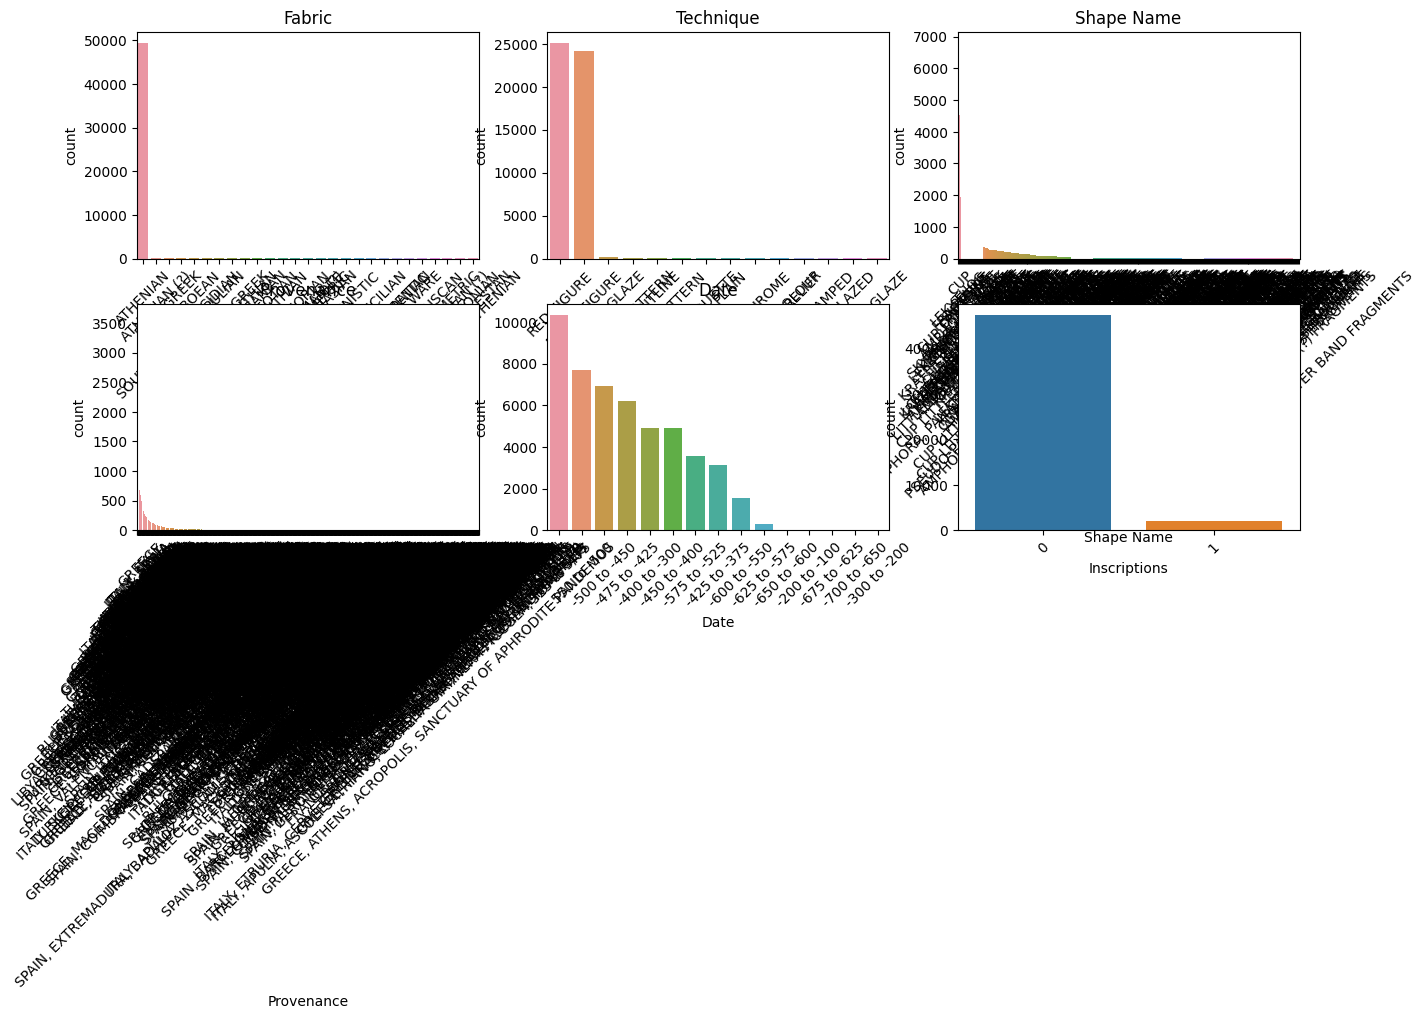

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
categories_to_plot = ['Fabric', 'Technique', 'Shape Name', 'Provenance', 'Date', 'Inscriptions']

# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each categorical variable and plot the category counts
for i, column in enumerate(categories_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[column], order=df[column].value_counts().index)
    plt.title(column)
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df.shape

(49523, 7)

In [ ]:
df.to_csv("null_free_subset.csv")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'df' is your DataFrame with the target column named 'Target' (replace with your actual target column name)
# Assuming all columns are categorical

# Separate features and target variable
X = df.drop('Date', axis=1)
y = df['Date']

# One-hot encode categorical columns
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


KeyboardInterrupt: ignored